In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_GER = df[df['job_country'] == 'Germany'].dropna(subset=['salary_year_avg'])

In [11]:
job_titles = df_GER['job_title_short'].value_counts().index[:7].tolist()

job_titles.remove('Machine Learning Engineer')
job_titles

['Data Analyst',
 'Data Scientist',
 'Data Engineer',
 'Senior Data Engineer',
 'Senior Data Scientist',
 'Senior Data Analyst']

In [13]:
df_GER_top6 = df_GER[df_GER['job_title_short'].isin(job_titles)]

In [16]:
job_order = df_GER_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending = False).index

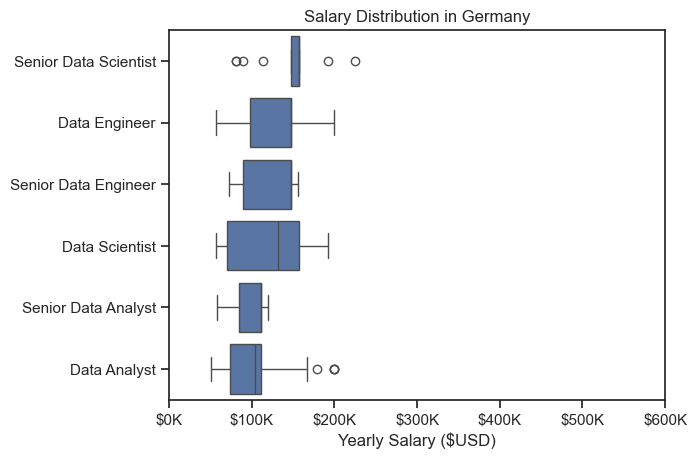

In [17]:
sns.boxplot(data = df_GER_top6, x = 'salary_year_avg', y = 'job_title_short', order = job_order)
sns.set_theme(style = 'ticks')

plt.title('Salary Distribution in Germany')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

In [18]:
df_DA_GER = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'Germany')].copy()

In [19]:
df_DA_GER = df_DA_GER.dropna(subset = 'salary_year_avg')

In [20]:
df_DA_GER = df_DA_GER.explode('job_skills')
df_DA_GER[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
127888,111175.0,python
127888,111175.0,javascript
127888,111175.0,r
127888,111175.0,sql
127888,111175.0,go


In [24]:
df_DA_top_pay = df_DA_GER.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'median', ascending = False)
df_DA_top_pay = df_DA_top_pay.head(10)

In [26]:
top_skills = df_DA_GER.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'count', ascending = False)
top_skills = top_skills.head(10).sort_values(by = 'median', ascending= False)
top_skills

,count,median
job_skills,,
python,2,111175.0
flask,1,111175.0
go,1,111175.0
javascript,1,111175.0
pyspark,1,111175.0
r,1,111175.0
react,1,111175.0
sql,2,106837.5
atlassian,1,102500.0


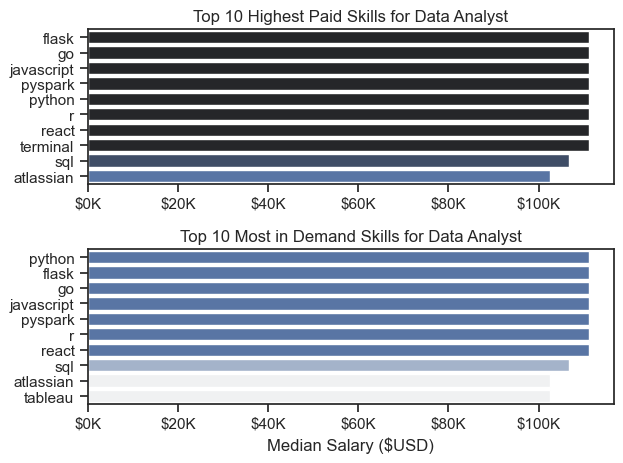

In [27]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style = 'ticks')

sns.barplot(data = df_DA_top_pay, x = 'median', y = df_DA_top_pay.index, ax = ax[0], hue = 'median', palette = 'dark:b_r')
ax[0].legend().remove()

ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


sns.barplot(data = top_skills, x = 'median', y = top_skills.index, ax = ax[1], hue = 'median', palette = 'light:b')
ax[1].legend().remove()

ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most in Demand Skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
fig.tight_layout()
plt.show()